In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
os.getcwd()

'C:\\Users\\sherw\\AAA_Term3_CV_HWs\\HW1'

In [3]:
os.chdir(r'C:\Users\sherw\OneDrive\Desktop\HW1_Vision\New folder')

In [4]:
img = cv2.imread('Noise.png')

In [5]:
# plt.rcParams['figure.figsize'] = (6,6)

In [6]:
# plt.style.use(['dark_background'])

## gaussian:

In [7]:
# noise_gauss = np.copy(img).astype(np.int)
# noise_gauss = cv2.randn(noise_gauss,0,20)

# noise_gauss[:,:,1] = noise_gauss[:,:,0]
# noise_gauss[:,:,2] = noise_gauss[:,:,0]

In [8]:
# img_gauss = (np.clip(img+noise_gauss,0,255)).astype(np.uint8)
# img_gauss = cv2.cvtColor(img_gauss,cv2.COLOR_BGR2RGB)
# plt.imshow(img_gauss)

In [30]:
noise_gauss = np.copy(img).astype(np.int)
noise_gauss = cv2.randn(noise_gauss,(0,0,0),(30,30,30))

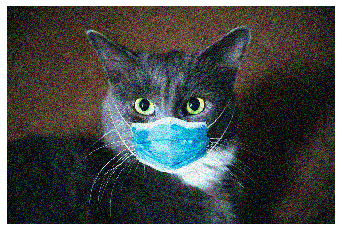

In [70]:
img_gauss = (np.clip(img.astype(int)+noise_gauss,0,255)).astype(np.uint8)
img_gauss = cv2.cvtColor(img_gauss,cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_gauss)
img_gauss = cv2.cvtColor(img_gauss,cv2.COLOR_RGB2BGR)
cv2.imwrite('gaussian.png',img_gauss)
img_gauss = cv2.cvtColor(img_gauss,cv2.COLOR_RGB2BGR)


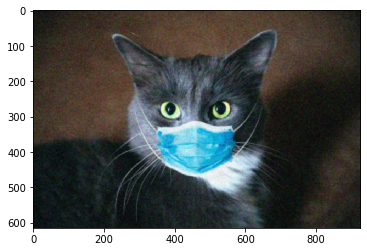

In [55]:
den_gauss = cv2.GaussianBlur(img_gauss,(7,7),0)
plt.imshow(den_gauss)
plt.show()

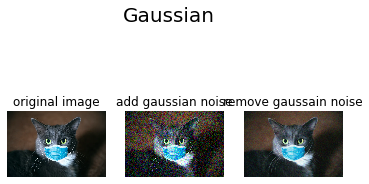

In [59]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.subplot(1,3,1)
plt.imshow(img_rgb,vmin = 0, vmax = 255)
plt.title('original image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img_gauss)
plt.axis('off')
plt.title('add gaussian noise')
plt.subplot(1,3,3)
plt.imshow(den_gauss,vmin = 0, vmax = 255)
plt.title('remove gaussain noise')
plt.axis('off')
plt.suptitle('Gaussian',size = 20)
plt.savefig('2a.png')
plt.show()

## uniform:

In [364]:
# noise_uni = np.copy(img).astype(np.int)
# noise_uni = cv2.randu(noise_uni,-100,0)

# noise_uni[:,:,1] = noise_uni[:,:,0]
# noise_uni[:,:,2] = noise_uni[:,:,0]

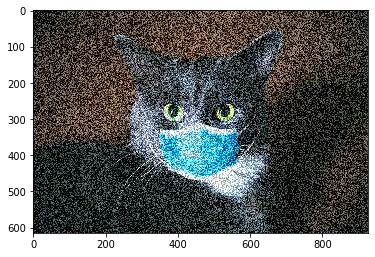

In [365]:
# img_uni = (np.clip(img+noise_uni,0,255)).astype(np.uint8)
# img_uni = cv2.cvtColor(img_uni,cv2.COLOR_BGR2RGB)
# plt.imshow(img_uni)

In [61]:
noise_uni = np.copy(img).astype(np.int)
noise_uni = cv2.randu(img_gauss,(-60,-60,-60),(60,60,60))

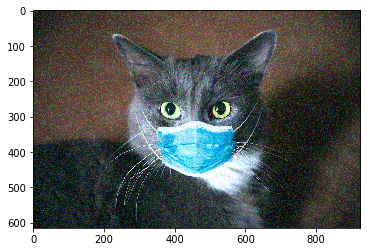

True

In [78]:
img_uni = (np.clip(img.astype(np.int)+noise_uni,0,255)).astype(np.uint8)
img_uni = cv2.cvtColor(img_uni,cv2.COLOR_BGR2RGB)
plt.imshow(img_uni)
plt.show()
img_uni_rgb = cv2.cvtColor(img_uni,cv2.COLOR_BGR2RGB)
cv2.imwrite('uniform.png',img_uni_rgb)

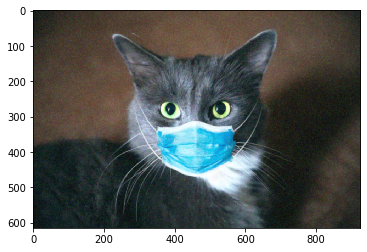

In [66]:
den_uni = cv2.GaussianBlur(img_uni,(5,5),0)
plt.imshow(den_uni)
plt.show()

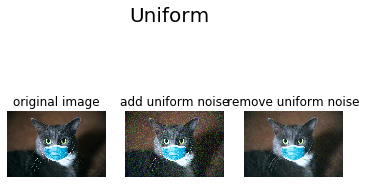

In [100]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.subplot(1,3,1)
plt.imshow(img_rgb,vmin = 0, vmax = 255)
plt.title('original image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img_uni)
plt.axis('off')
plt.title('add uniform noise')
plt.subplot(1,3,3)
plt.imshow(den_uni,vmin = 0, vmax = 255)
plt.title('remove uniform noise')
plt.axis('off')
plt.suptitle('Uniform',size = 20)
plt.savefig('2b.png')
plt.show()

## S&P:

In [80]:
def add_sp_rgb(image,salt_prob, pepper_prob):
    chs = cv2.split(image)
    sp = []
    for ch in chs:
        row,col = ch.shape
        noisy = np.zeros(ch.shape)
        for i in range(row):
            for j in range(col):
                noisy[i,j] = np.random.choice([ch[i,j],255,0], p=[1-(salt_prob+pepper_prob),salt_prob,pepper_prob])
        sp.append(noisy)
    sp = cv2.merge(sp)
    sp = np.clip(sp,0,255)
    sp = sp.astype(np.uint8)
    sp = cv2.cvtColor(sp,cv2.COLOR_BGR2RGB)
    return sp

In [81]:
img_sp = add_sp_rgb(img,0.02,0.02)

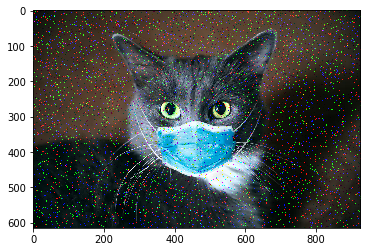

In [99]:
img_sp_rgb = cv2.cvtColor(img_sp,cv2.COLOR_BGR2RGB)
cv2.imwrite('saltpepper.png',img_sp_rgb)
plt.imshow(img_sp)
plt.show()

In [85]:
den_sp  = cv2.medianBlur(img_sp, 3)

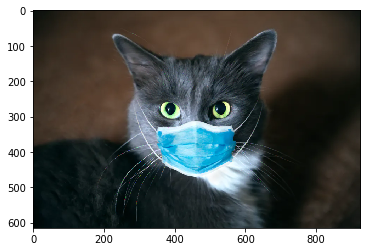

In [88]:
plt.imshow(den_sp)
plt.show()

In [97]:
%matplotlib inline

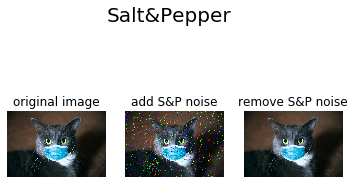

In [98]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.subplot(1,3,1)
plt.imshow(img_rgb,vmin = 0, vmax = 255)
plt.title('original image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img_sp)
plt.axis('off')
plt.title('add S&P noise')
plt.subplot(1,3,3)
plt.imshow(den_sp,vmin = 0, vmax = 255)
plt.title('remove S&P noise')
plt.axis('off')
plt.suptitle('Salt&Pepper',size = 20)
plt.savefig('2c.png')
plt.show()

## impulse:

In [101]:
def add_impulse_rgb(image,salt_prob):
    chs = cv2.split(image)
    sp = []
    for ch in chs:
        row,col = ch.shape
        noisy = np.zeros(ch.shape)
        for i in range(row):
            for j in range(col):
                noisy[i,j] = np.random.choice([ch[i,j],255], p=[1-(salt_prob),salt_prob])
        sp.append(noisy)
    sp = cv2.merge(sp)
    sp = np.clip(sp,0,255)
    sp = sp.astype(np.uint8)
    sp = cv2.cvtColor(sp,cv2.COLOR_BGR2RGB)
    return sp

In [102]:
img_im = add_impulse_rgb(img,0.04)

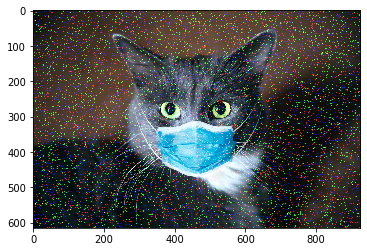

In [113]:
img_im_rgb = cv2.cvtColor(img_im,cv2.COLOR_BGR2RGB)
cv2.imwrite('impulse.png',img_im_rgb)
plt.imshow(img_im)
plt.show()

In [104]:
den_im  = cv2.medianBlur(img_im, 5)

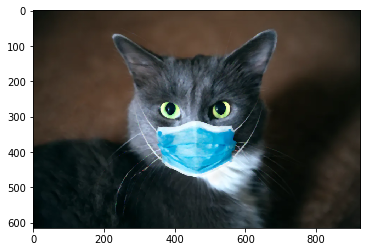

In [111]:
plt.imshow(den_im)
plt.show()

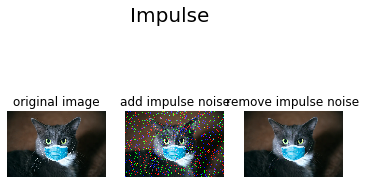

In [110]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.subplot(1,3,1)
plt.imshow(img_rgb,vmin = 0, vmax = 255)
plt.title('original image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img_im)
plt.axis('off')
plt.title('add impulse noise')
plt.subplot(1,3,3)
plt.imshow(den_im,vmin = 0, vmax = 255)
plt.title('remove impulse noise')
plt.axis('off')
plt.suptitle('Impulse',size = 20)
plt.savefig('2b.png')
plt.show()